In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

hearth_rate_data = "/home/manuel/Downloads/Databases/samsunghealth_files/csv/heartRate.csv"

In [7]:
df = pd.read_csv(hearth_rate_data)
# Print the first 5 rows of the DataFrame to verify it was read correctly
print(df.head())
print("Train data shape:", df.shape)

   start_timestamp  end_timestamp  heart_rate  heart_rate_min  heart_rate_max
0    1739709300000  1739709359000        57.0            56.0            59.0
1    1739709360000  1739709419000        60.0            58.0            67.0
2    1739709420000  1739709479000        58.0            56.0            66.0
3    1739709480000  1739709539000        59.0            57.0            65.0
4    1739709540000  1739709599000        56.0            56.0            58.0
Train data shape: (107554, 5)


In [8]:
# Convert timestamp column to datetime objects from Unix milliseconds.
# This is the key change: we specify unit='ms'
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], unit='ms')

# Set the timestamp column as the DataFrame index.
df.set_index('start_timestamp', inplace=True)

In [9]:
# Define the columns you want to aggregate
columns_to_aggregate = ['heart_rate', 'heart_rate_min', 'heart_rate_max']

# Aggregate by Hour and calculate the mean
# 'H' is the offset alias for hourly frequency.
hourly_mean_df = df[columns_to_aggregate].resample('h').mean()

# Aggregate by Day and calculate the mean
# 'D' is the offset alias for daily frequency.
daily_mean_df = df[columns_to_aggregate].resample('D').mean()

print("\n--- Converted DataFrame Head ---")
print(df.head())
print("\n--- Hourly Mean Aggregation ---")
print(hourly_mean_df.head())
print("\n--- Daily Mean Aggregation ---")
print(daily_mean_df.head())


--- Converted DataFrame Head ---
                     end_timestamp  heart_rate  heart_rate_min  heart_rate_max
start_timestamp                                                               
2025-02-16 12:35:00  1739709359000        57.0            56.0            59.0
2025-02-16 12:36:00  1739709419000        60.0            58.0            67.0
2025-02-16 12:37:00  1739709479000        58.0            56.0            66.0
2025-02-16 12:38:00  1739709539000        59.0            57.0            65.0
2025-02-16 12:39:00  1739709599000        56.0            56.0            58.0

--- Hourly Mean Aggregation ---
                     heart_rate  heart_rate_min  heart_rate_max
start_timestamp                                                
2025-02-16 12:00:00   56.440000       54.560000       60.960000
2025-02-16 13:00:00   58.111111       56.333333       62.444444
2025-02-16 14:00:00         NaN             NaN             NaN
2025-02-16 15:00:00         NaN             NaN             

In [10]:
def plot_data(df, title, xlabel='Date', ylabel='Beats Per Minute (BPM)'):
    
    plt.figure(figsize=(10, 6)) # Set the figure size
    sns.lineplot(data=df)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


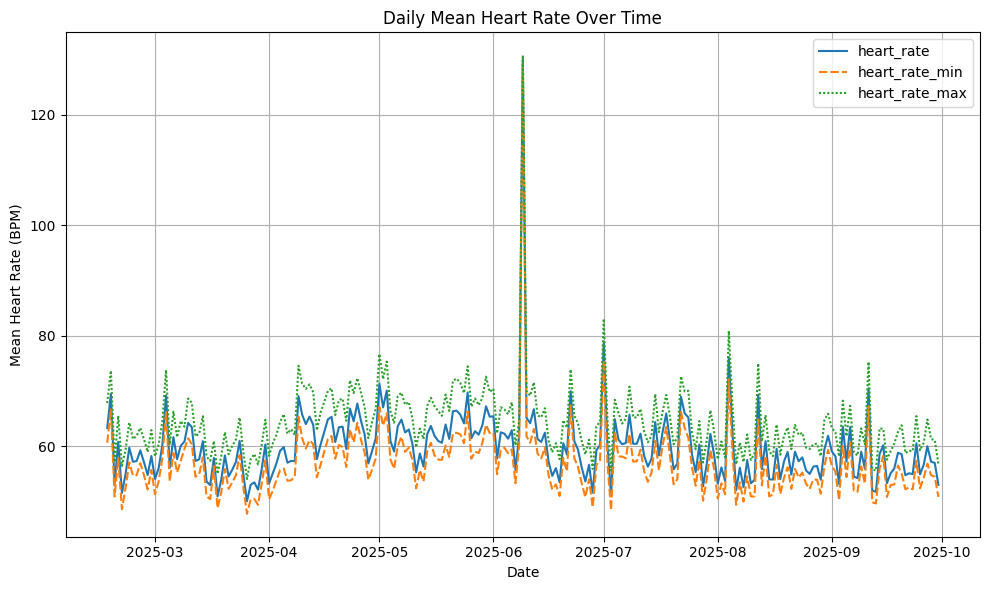

In [11]:
plot_data(daily_mean_df, title='Daily Mean Heart Rate Over Time', ylabel='Mean Heart Rate (BPM)', xlabel='Date')

In [12]:
# --- Find Max and Min Heart Rates ---

# 1. Find the overall maximum heart rate from the 'heart_rate_max' column
overall_max_hr = daily_mean_df['heart_rate_max'].max()

# 2. Find the date on which this maximum occurred
date_of_max_hr = daily_mean_df['heart_rate_max'].idxmax()


# 3. Find the overall minimum heart rate from the 'heart_rate_min' column
overall_min_hr = daily_mean_df['heart_rate_min'].min()

# 4. Find the date on which this minimum occurred
date_of_min_hr = daily_mean_df['heart_rate_min'].idxmin()


# --- Print the results ---
print("--- Daily Mean DataFrame ---")
print(daily_mean_df)

print("\n--- Heart Rate Summary ---")
# Use .date() to show only the date part of the timestamp for cleaner output
print(f"The highest average maximum heart rate was: {overall_max_hr:.2f} BPM, which occurred on {date_of_max_hr.date()}")
print(f"The lowest average minimum heart rate was:  {overall_min_hr:.2f} BPM, which occurred on {date_of_min_hr.date()}")

--- Daily Mean DataFrame ---
                 heart_rate  heart_rate_min  heart_rate_max
start_timestamp                                            
2025-02-16        63.346369       60.670391       67.849162
2025-02-17        69.479757       66.834008       73.716599
2025-02-18        53.251685       50.950562       57.173034
2025-02-19        60.833333       57.835294       65.549020
2025-02-20        51.594175       48.658252       56.487379
...                     ...             ...             ...
2025-09-26        56.710417       54.331250       60.681250
2025-09-27        60.040903       56.884344       64.868829
2025-09-28        57.235067       54.789981       61.342967
2025-09-29        57.018349       54.530275       61.157798
2025-09-30        53.056000       50.866667       56.770667

[227 rows x 3 columns]

--- Heart Rate Summary ---
The highest average maximum heart rate was: 130.73 BPM, which occurred on 2025-06-09
The lowest average minimum heart rate was:  47.82 BPM,

In [13]:
from IPython.display import display
# Highlight the maximum value in each column
display(daily_mean_df)

,heart_rate,heart_rate_min,heart_rate_max
start_timestamp,,,
2025-02-16,63.346369,60.670391,67.849162
2025-02-17,69.479757,66.834008,73.716599
2025-02-18,53.251685,50.950562,57.173034
2025-02-19,60.833333,57.835294,65.549020
2025-02-20,51.594175,48.658252,56.487379
...,...,...,...
2025-09-26,56.710417,54.331250,60.681250
2025-09-27,60.040903,56.884344,64.868829
2025-09-28,57.235067,54.789981,61.342967


In [14]:
def show_data_for_date(df, date_str):
    """
    Filters and displays the heart rate data for a specific date.

    Args:
        df (pandas.DataFrame): The input DataFrame with a DatetimeIndex.
        date_str (str): The date to filter by, in 'YYYY-MM-DD' format.
    """
    print(f"\n--- Searching for data on: {date_str} ---")
    
    # Filter the DataFrame. The .dt accessor is not needed when filtering the index directly.
    # df.index.date extracts just the date part of the DatetimeIndex for comparison.
    # pd.to_datetime(date_str).date() ensures we compare date objects to date objects.
    filtered_df = df[df.index.date == pd.to_datetime(date_str).date()]

    # Check if any data was found for the given date
    if filtered_df.empty:
        print("No data found for this date.")
        return df
    else:
        # Use .reset_index() to make the timestamp a column for aligned printing
        df_for_display = filtered_df.reset_index()
        
        # Display the results in a clean table
        return df_for_display


In [15]:
filter_df = show_data_for_date(df, '2025-06-09').drop(['end_timestamp'], axis=1)
filter_df


--- Searching for data on: 2025-06-09 ---


,start_timestamp,heart_rate,heart_rate_min,heart_rate_max
0,2025-06-09 00:00:00,70.0,59.0,79.0
1,2025-06-09 00:01:00,65.0,59.0,90.0
2,2025-06-09 00:02:00,64.0,62.0,68.0
3,2025-06-09 00:03:00,66.0,63.0,70.0
4,2025-06-09 00:04:00,68.0,62.0,76.0
...,...,...,...,...
3595,2025-06-09 23:55:00,77.0,73.0,82.0
3596,2025-06-09 23:56:00,74.0,70.0,79.0
3597,2025-06-09 23:57:00,65.0,52.0,81.0
3598,2025-06-09 23:58:00,64.0,61.0,66.0


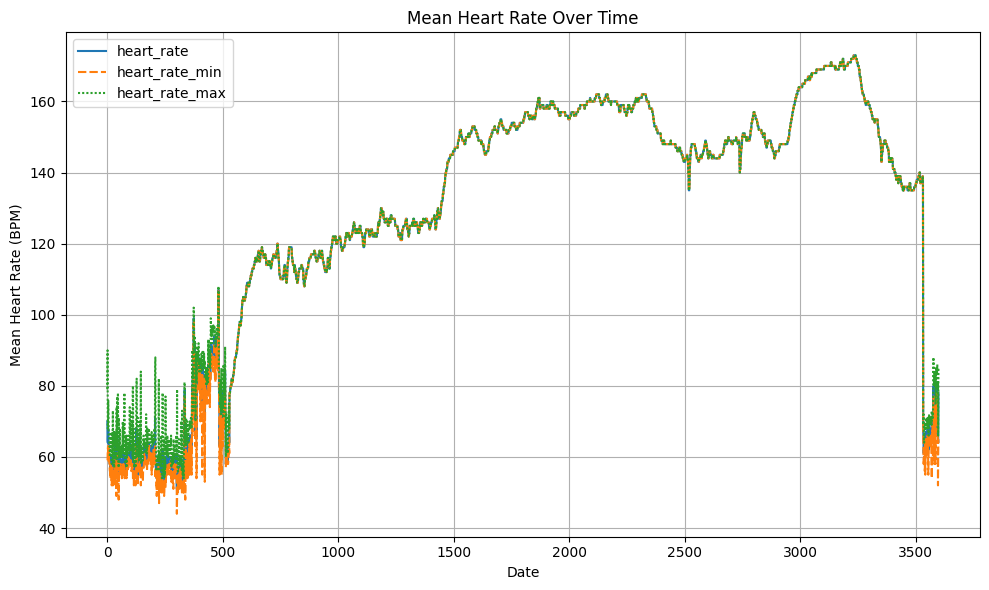

In [16]:
plot_data(filter_df, title='Mean Heart Rate Over Time', ylabel='Mean Heart Rate (BPM)', xlabel='Date')